# E-tivity 3: Linear classification
## MSc in AI - CE6002 & CS5062
Student Name: Michel Danjou

Student ID: 18263461

In [1]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05)
y = [yy if yy == 1 else -1 for yy in y] 

# Task 3 (CE6002)
#### *Create your own implementation of linear classification to perform a classification of the dataset provided in the Etivity3_LinearClassification.ipynb notebook without adding extra features to those provided. Use normal linear regression with sign(wTx) to obtain a classification. Notebook Etivity3_LinearClassification.ipynb is available in the git repository. Add your code to this notebook.*
 
Interesting reads: 
  * https://machinelearningmastery.com/solve-linear-regression-using-linear-algebra/
  * https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.9-The-Moore-Penrose-Pseudoinverse/ (homemade linear regression algo)
  * https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python (confusion matrix)

Taking a look at the data set:
  * X: is a 2D array of floats
  * y: is a 1D array of +1 and -1 values

In [4]:
print("X:", X)
print("\ny:", y)

X: [[-0.64299993 -0.79913901]
 [-1.02920658 -0.18111607]
 [ 0.94669216 -0.32594444]
 ...
 [ 0.41960758  0.77858178]
 [ 1.05289882  0.22192336]
 [-1.01750934 -0.27562527]]

y: [-1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1

In [5]:
Xcopy = np.copy(X)

In [6]:
# Plot the boundary
def decision_boundary_lin(weights, x_min, x_max):
   # Return two points on the decision boundary
   return [point_on_boundary_lin(weights, x_min), point_on_boundary_lin(weights, x_max)]

def point_on_boundary_lin(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

In [7]:
def linear_regression(X, y):
    X_inverse = np.linalg.pinv(X)
    w_lin = np.matmul(X_inverse, y)
    return w_lin


# Calculate the Mean Square Error
def calc_square_error(a, b):
    e_sq = 0
    N = len(a)
    for i in range(N):
        e_sq += math.pow((a[i] - b[i]),2)
    return e_sq/N


# Calculate the score: 1=all samples match, 0=all sample differ
def cal_score(a,b):
    errors = 0
    for i in range(len(a)):
        if a[i]!=b[i]:
            errors +=1
    return 1-errors/len(a)

            
def calculate_and_plot_linear_regression(X, y, title):
    plt.figure(figsize=(8,8))
    
    # Insert bias
    X = np.insert(X, 0, 1, axis=1)

    # shuffle data
    X, y = shuffle(X, y, random_state=0)

    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear regression
    weights = linear_regression(X_train, y_train)
    
    # Plot test data
    plt.scatter(X[:,1], X[:,2], c=y, label='original data')

    # Plot
    minx = np.amin(X)
    maxx = np.amax(X)
    miny, maxy = decision_boundary_lin(weights, minx, maxx)
    plt.plot([minx, maxx], [miny, maxy], 'ro-', label='decision boundary')
    
    # yhat (multiply yhat by 2 so that, when plotted, it doesn't overlap with scatter plot of X)
    yhat = X_test.dot(weights)
    plt.scatter(X_test[:,1], np.sign(yhat)*2, c=y_test, label='yhat (sign function) - horizontal scatter')
    
    # error
    error = calc_square_error(y_test,  np.sign(yhat))
    score = cal_score(y_test,  np.sign(yhat))
    
    # Marker for center point at coordinates (0,0)
    plt.plot([0], [0], marker='x', markersize=15, color="red", label='Origin - point (0,0)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc="best")

    plt.title('Linear classification of ' + title)

    
    return weights, yhat, error, score


Mean Square Error: 2.16
Accuracy Score   : 0.45999999999999996


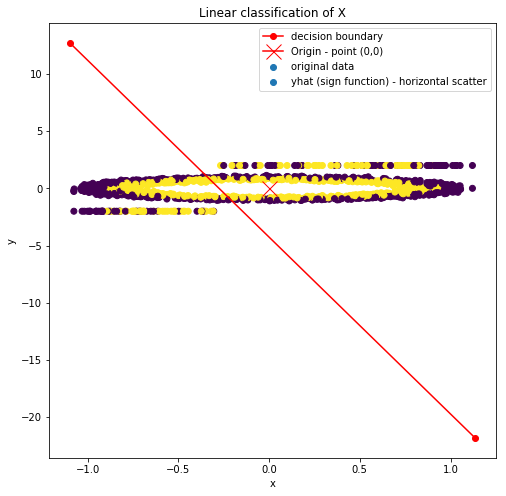

In [8]:
X = np.copy(Xcopy)

weights, yhat, error, score = calculate_and_plot_linear_regression(X, y, 'X')
print("Mean Square Error:", error)
print("Accuracy Score   :", score)

#### *Observe your results and explain why these results seem disappointing (record your thoughts in a Markdown cell in your notebook).*

  * The linear regression boundary sometimes split the data set evenly, sometimes it doesn't. 
  * The MSE is high at 2.16 and accuracy score at 0.45. This is expected since we split 2 **concentric circular distributions** more or less in the **middle** with a line.
  

#### *Now choose suitable new features and use these in your linear regression algorithm to improve the classification performance. Observe and explain (use plots where appropriate) why the classification performance has improved. Try a few different ones and note the differences!*

Interesting reads: 
  *   https://www.deeplearningbook.org/contents/ml.html (page 110, figure 5.16)
  
##### Square transformation  

Mean Square Error: 0.08
Accuracy Score   : 0.98


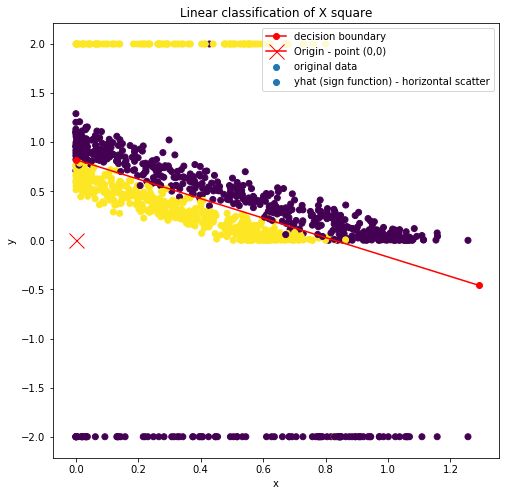

In [9]:
X = np.copy(Xcopy)
X = np.square(X)

weights, yhat, error, score = calculate_and_plot_linear_regression(X, y, 'X square')
print("Mean Square Error:", error)
print("Accuracy Score   :", score)

##### Cubic transformation
We can see that for the cubic transformation, the error is has high as with the original data set. This is expected as the cubic transformation preserves the sign of X which results in a distribution pattern centered around the origin in our case.

Mean Square Error: 1.94
Accuracy Score   : 0.515


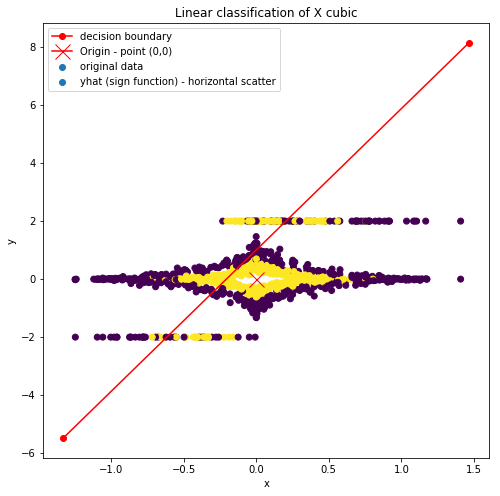

In [10]:
X = np.copy(Xcopy)
X = np.power(X, 3)

weights, yhat, error, score = calculate_and_plot_linear_regression(X, y, 'X cubic')
print("Mean Square Error:", error)
print("Accuracy Score   :", score)

##### Power 4 transformation
The error is higher than for the power of 2 transformation. This is counter-intuitive as I would have expected the error to remain the same. However, this could be a sign of **overfitting**.


Mean Square Error: 0.56
Accuracy Score   : 0.86


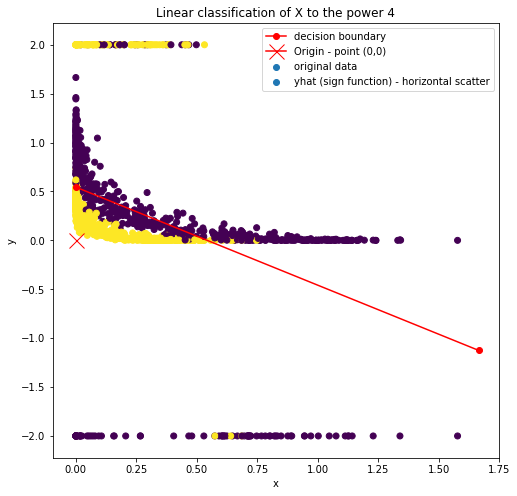

In [11]:
X = np.copy(Xcopy)
X = np.power(X, 4)

weights, yhat, error, score = calculate_and_plot_linear_regression(X, y, 'X to the power 4')
print("Mean Square Error:", error)
print("Accuracy Score   :", score)

##### Trigonometric transformations
Out of curiosity, I wanted to see the impact of a trigonometric function on the Linear classification, instead of a polynomial transformation.

Reference: https://commons.wikimedia.org/wiki/Trigonometric_function_plots

We can see that cos() and cosh() gives an error rate similar to square(). This doesn't mean that in general, cos() is a good as square(). The fact that the error is as good as square() probably boils down to the distribution of the sample in the first place.

Mean Square Error: 0.1
Accuracy Score   : 0.975


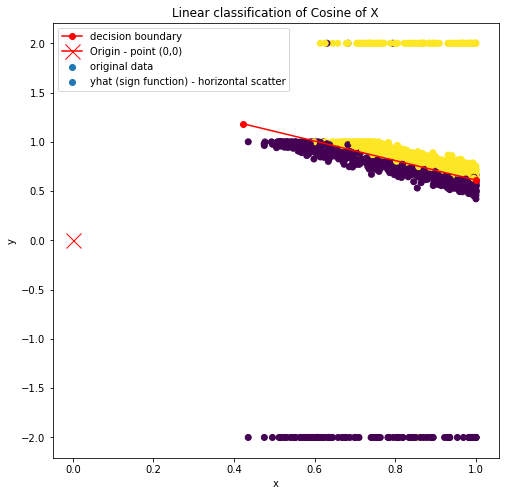

In [12]:
X = np.copy(Xcopy)
X = np.cos(X)

weights, yhat, error, score = calculate_and_plot_linear_regression(X, y, 'Cosine of X')
print("Mean Square Error:", error)
print("Accuracy Score   :", score)

Mean Square Error: 0.08
Accuracy Score   : 0.98


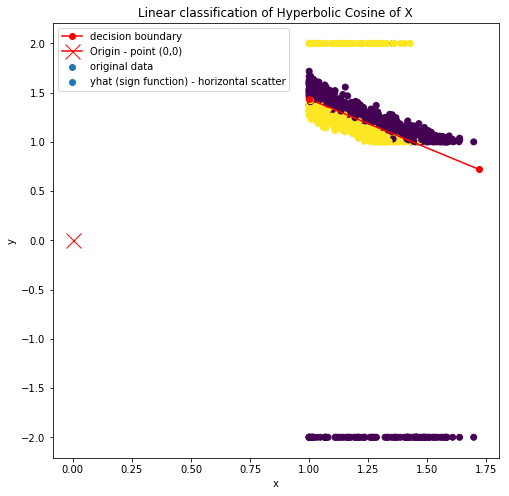

In [13]:
X = np.copy(Xcopy)
X = np.cosh(X)

weights, yhat, error, score = calculate_and_plot_linear_regression(X, y, 'Hyperbolic Cosine of X')
print("Mean Square Error:", error)
print("Accuracy Score   :", score)

Mean Square Error: 2.16
Accuracy Score   : 0.45999999999999996


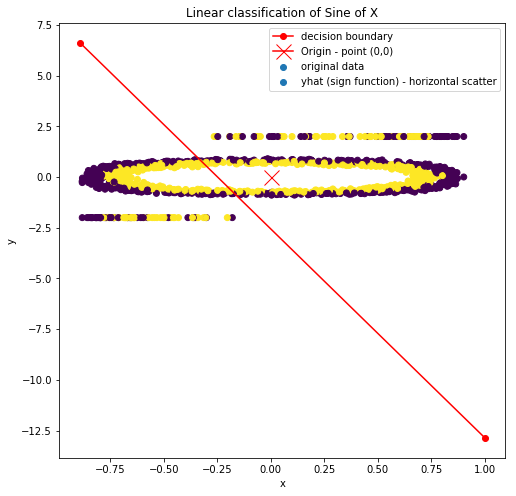

In [14]:
X = np.copy(Xcopy)
X = np.sin(X)

weights, yhat, error, score = calculate_and_plot_linear_regression(X, y, 'Sine of X')
print("Mean Square Error:", error)
print("Accuracy Score   :", score)

#### *Also, use scikit-learn’s Logistic Regression algorithm and compare the performance with your algorithm. It is useful to spend some time thinking about the difference in approach taken in Logistic Regression.*

Interesting links: 
  * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
  * https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression
  * https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
 

Score on train data: 0.5075
Score on test data : 0.435


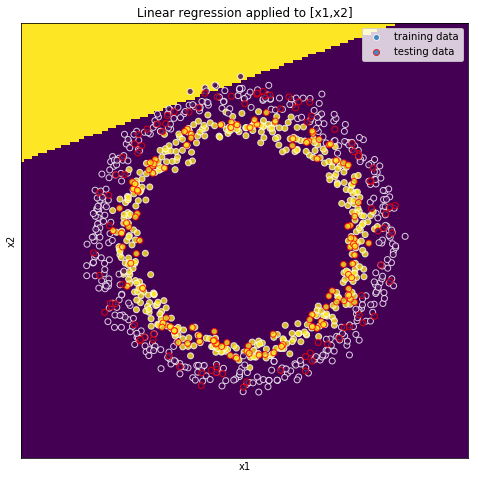

Score on train data: 0.975
Score on test data : 0.995


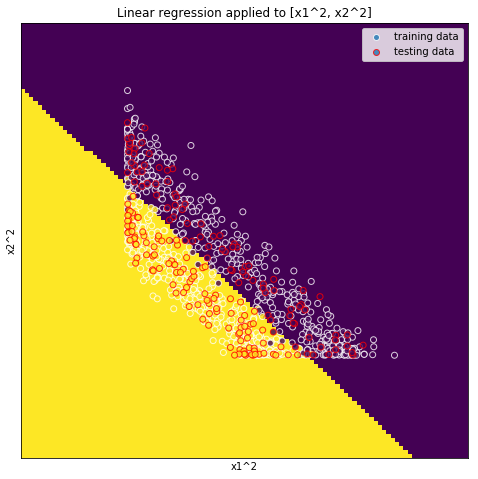

In [15]:
# With test/train split

def logistic_regression_scikit(X, y, xlabel, ylabel, title):
    plt.figure(figsize=(8,8))

    color_map = 'Pastel1'

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  
    # fit on training data
    logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
    logreg.fit(X_train, y_train)

    # score on testing data
    score_train = logreg.score(X_train, y_train)
    score_test = logreg.score(X_test, y_test)
    print("Score on train data:", score_train)
    print("Score on test data :", score_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_test[:, 0].min() - .5, X_test[:, 0].max() + .5
    y_min, y_max = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5
    h = .02  # step size in the mesh

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, label='decision boundary')

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8, edgecolors='w', label='training data')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8, edgecolors='r', label='testing data')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc="best")
    plt.title(title)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()


# Logistic regression on X
X = np.copy(Xcopy)
logistic_regression_scikit(X, y, 'x1', 'x2', 'Logistic regression applied to [x1,x2]')

# Logistic regression on X square
logistic_regression_scikit(np.square(X), y, 'x1^2', 'x2^2', 'Logistic regression applied to [x1^2, x2^2]')


### Comparison between the Home made Linear Regression and the Logistic Regression

Reference: https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

Comparison in terms of performance:
  * Both algorithms perform **poorly** on the **initial data set** with both having a very high error rate represented by a line crossing the data set. 
  * Both algorithms **improve** greatly when using the **squared feature** with an accuracy score of 0.97 on test data.

Comparison in terms of approach:
  * The Linear Regression uses the **sign** of the yhat function to determine the boundary and therefore can **only map 2** discret classes.
  * The Logistic Regression uses a **sigmoid** function to return a probability which can be used to map to **2 or more** discret classes.

